In [1]:
# Pacote pandas: https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd

# Pacote matplotlib: https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

# Pacote numpy: https://numpy.org/doc/
import numpy as np

# Pacote https://docs.python.org/3/library/datetime.html
from datetime import datetime

#https://scikit-learn.org/stable/index.html
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pacote os: https://docs.python.org/3/library/os.html
import os

In [2]:
# Versão Python
from platform import python_version
print(python_version())

3.11.5


## Carga de dados 

In [3]:
df_clients = pd.read_csv('Dados/customer_segmentation.csv')

## Análise Exploratória

In [4]:
df_clients.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df_clients.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df_clients.shape

(2240, 29)

In [8]:
df_clients.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

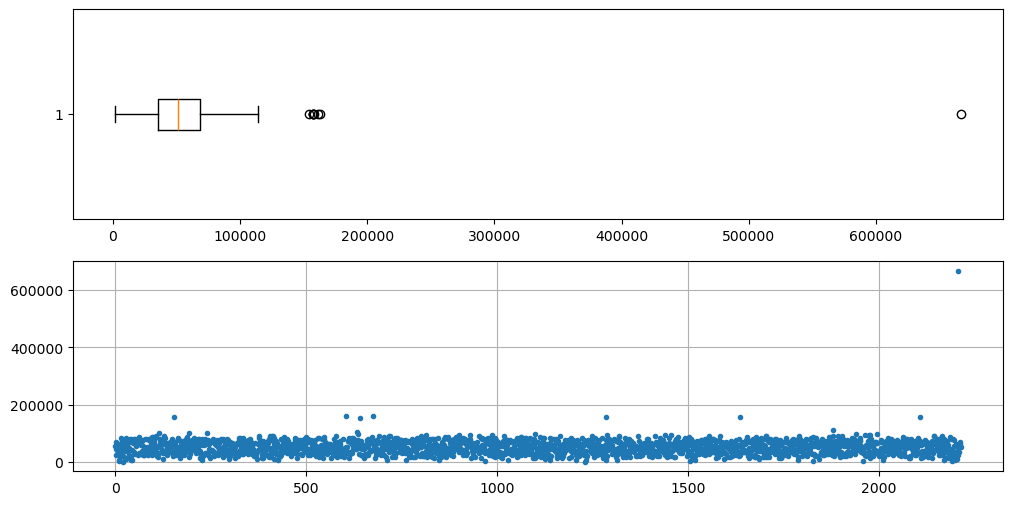

In [9]:
#Detecção de outliers

df_income = df_clients.dropna(subset=['Income'])
income_array = np.array(df_income['Income'])

# Criando o boxplot
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.boxplot(income_array, vert=False)
plt.subplot(212)
plt.plot(income_array, '.')
plt.grid()
plt.show()

In [10]:
# Visualizar linha com valor discrepante

outlier_row = df_income.loc[df_income['Income'] == 666666.000000 ]

for index, row in outlier_row.iterrows():
    print(row)

ID                           9432
Year_Birth                   1977
Education              Graduation
Marital_Status           Together
Income                   666666.0
Kidhome                         1
Teenhome                        0
Dt_Customer            02-06-2013
Recency                        23
MntWines                        9
MntFruits                      14
MntMeatProducts                18
MntFishProducts                 8
MntSweetProducts                1
MntGoldProds                   12
NumDealsPurchases               4
NumWebPurchases                 3
NumCatalogPurchases             1
NumStorePurchases               3
NumWebVisitsMonth               6
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 2233, dt

## Limpeza e Transformação

In [11]:
# Copia do dataframe para realizar clusterização e remoção de anomalias

df_new = df_clients.copy()

# Obtendo o ano atual
current_year = datetime.now().year

# Calculando a idade dos clientes
df_new['Age'] = current_year - df_new['Year_Birth']

# Removendo clientes com mais de 100 anos
df_new = df_new[df_new['Age'] <= 100]

# Removendo linha com valor discrepante
df_new = df_new[df_new['Income'] != 666666.000000]


In [12]:
df_new.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2236.000000,2236.000000,2212.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000
mean,5589.008497,1968.898032,51958.810579,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,...,0.072898,0.074687,0.072451,0.064401,0.013417,0.008945,3.0,11.0,0.149374,55.101968
std,3244.826887,11.703281,21527.278844,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,...,0.260027,0.262944,0.259291,0.245520,0.115077,0.094173,0.0,0.0,0.356536,11.703281
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,2828.250000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,8421.750000,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,84.000000


In [13]:
# Substituição de valores nulos pela média
mean_income = df_new['Income'].mean()
df_new['Income'] = df_new['Income'].fillna(mean_income)

df_new.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

In [14]:
# Visualizando a distribuição dos valores de 'Marital'
print(df_new['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


## Clusterização

In [15]:
# Selecionando as colunas para a clusterização
features = ['Income', 'Age', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_cluster = df_new[features].copy()

In [16]:
# Normalização dos dados (colocar na mesma escala)

# Criando o objeto StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados
df_normalized = scaler.fit_transform(df_cluster)

# Convertendo de volta para um dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df_cluster.columns)

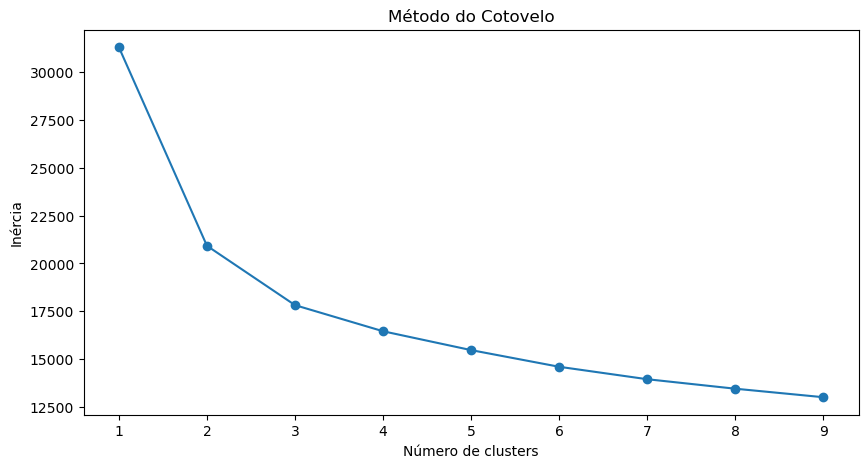

In [17]:
# Encontrar o numero de cluster com o método do cotovelo

# Lista para armazenar as inércias
inertias = []

# Intervalo de valores de k
k_values = range(1, 10)

for k in k_values:
    # Criando o objeto KMeans
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # Ajustando os dados
    kmeans.fit(df_normalized)
    
    # Adicionando a inércia à lista
    inertias.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, 'o-')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [18]:
# Aplicação do algoritmo K-means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(df_normalized)

# Adicionando os rótulos dos clusters ao dataframe
df_cluster['cluster'] = kmeans.labels_

# Adicionando a coluna 'cluster' ao DataFrame df_new
df_new['cluster'] = df_cluster['cluster']

In [19]:
print(df_new['cluster'].value_counts())

cluster
1    1017
0     637
2     582
Name: count, dtype: int64


In [20]:
df_new.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,cluster
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,51958.810579,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,...,0.074687,0.072451,0.064401,0.013417,0.008945,3.0,11.0,0.149374,55.101968,0.975403
std,3244.826887,11.703281,21411.384172,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,...,0.262944,0.259291,0.245520,0.115077,0.094173,0.0,0.0,0.356536,11.703281,0.738111
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000,0.000000
25%,2828.250000,1959.000000,35502.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000,0.000000
50%,5454.500000,1970.000000,51684.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000,1.000000
75%,8421.750000,1977.000000,68275.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000,2.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,84.000000,2.000000


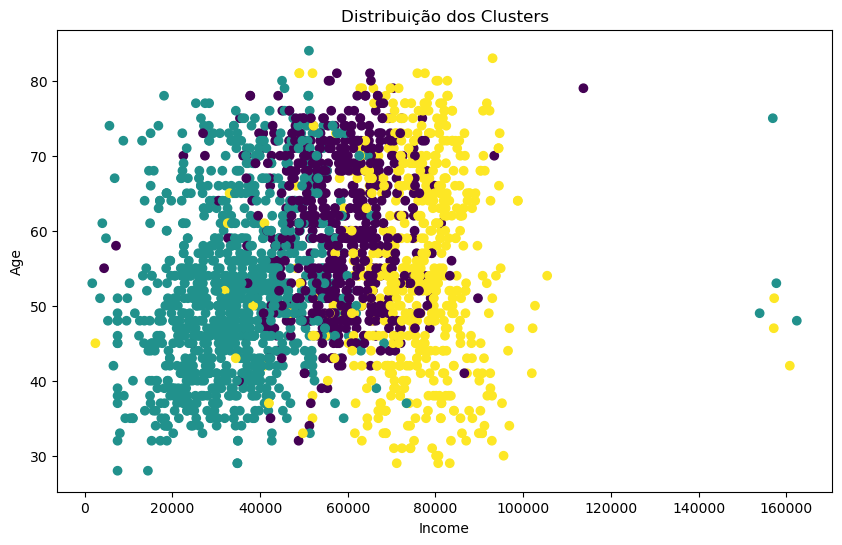

In [21]:
# Criando um gráfico de dispersão da distribuição dos clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_new['Income'], df_new['Age'], c=df_new['cluster'])
plt.title('Distribuição dos Clusters')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [22]:
df_new.to_csv("Dados/novo_clientes_clusters.csv", index=False)